In [5]:
# Music Genre Classification Using Fully Connected
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [9]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    targets = targets - 1

    return inputs, targets


def plot_history(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accucary eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [10]:
inputs, targets = load_data(dataset_path=DATASET_PATH)

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                          targets,
                                                                          test_size=0.3)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

    keras.layers.Dense(2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

history = model.fit(inputs_train, targets_train,
                    validation_data=(inputs_test, targets_test),
                    epochs=100,
                    batch_size=64)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3367)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              6897664   
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)              

Epoch 43/100
55/55 [==============================] - 6s 103ms/step - loss: 6.4453 - accuracy: 0.2884 - val_loss: 6.3300 - val_accuracy: 0.3491
Epoch 44/100
55/55 [==============================] - 5s 96ms/step - loss: 6.4030 - accuracy: 0.2981 - val_loss: 6.2644 - val_accuracy: 0.3585
Epoch 45/100
55/55 [==============================] - 5s 95ms/step - loss: 6.3958 - accuracy: 0.2959 - val_loss: 6.2669 - val_accuracy: 0.3692
Epoch 46/100
55/55 [==============================] - 5s 98ms/step - loss: 6.3462 - accuracy: 0.2961 - val_loss: 6.2328 - val_accuracy: 0.3785
Epoch 47/100
55/55 [==============================] - 5s 96ms/step - loss: 6.3150 - accuracy: 0.3004 - val_loss: 6.1995 - val_accuracy: 0.3845
Epoch 48/100
55/55 [==============================] - 5s 97ms/step - loss: 6.2672 - accuracy: 0.3187 - val_loss: 6.1915 - val_accuracy: 0.3752
Epoch 49/100
55/55 [==============================] - 5s 97ms/step - loss: 6.2518 - accuracy: 0.3124 - val_loss: 6.1444 - val_accuracy: 0.366

55/55 [==============================] - 5s 90ms/step - loss: 4.3504 - accuracy: 0.4521 - val_loss: 4.5356 - val_accuracy: 0.4459


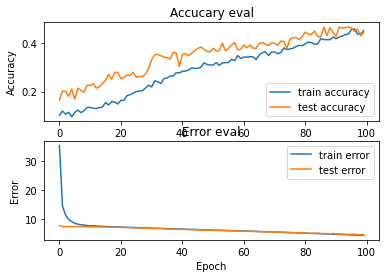

In [11]:
plot_history(history)